In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dia.srivastava.12/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import xgboost
import wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('movies_metadata.csv')
df.head(10)

,genres,original_title,popularity,production_companies,release_date,status,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,Released,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,Released,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,Released,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,Released,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,Released,Father of the Bride Part II,5.7,173.0
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,Released,Heat,7.7,1886.0
6,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Sabrina,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",1995-12-15,Released,Sabrina,6.2,141.0
7,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Tom and Huck,2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1995-12-22,Released,Tom and Huck,5.4,45.0
8,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,Released,Sudden Death,5.5,174.0
9,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",GoldenEye,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,Released,GoldenEye,6.6,1194.0


In [5]:
df.shape

(45466, 9)

In [6]:
df.isnull().sum()

genres                   0
original_title           0
popularity               5
production_companies     3
release_date            87
status                  87
title                    6
vote_average             6
vote_count               6
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45466 non-null  object 
 1   original_title        45466 non-null  object 
 2   popularity            45461 non-null  object 
 3   production_companies  45463 non-null  object 
 4   release_date          45379 non-null  object 
 5   status                45379 non-null  object 
 6   title                 45460 non-null  object 
 7   vote_average          45460 non-null  float64
 8   vote_count            45460 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.1+ MB


In [8]:
df.duplicated().sum()

17

In [9]:
df.shape

(45466, 9)

In [10]:
df.isnull().sum()

genres                   0
original_title           0
popularity               5
production_companies     3
release_date            87
status                  87
title                    6
vote_average             6
vote_count               6
dtype: int64

In [11]:
df[df['release_date'].isnull()]

,genres,original_title,popularity,production_companies,release_date,status,title,vote_average,vote_count
711,[],War Stories Our Mother Never Told Us,0.005625,[],NaN,Released,War Stories Our Mother Never Told Us,0.0,0.0
734,[],Vermont Is for Lovers,0.75,[],NaN,Released,Vermont Is for Lovers,0.0,0.0
3460,"[{'id': 18, 'name': 'Drama'}]","Jails, Hospitals & Hip-Hop",0.009057,[],NaN,NaN,"Jails, Hospitals & Hip-Hop",0.0,0.0
3628,[],Boricua's Bond,0.035352,[],NaN,Released,Boricua's Bond,2.0,1.0
5879,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Divine Intervention,0.001181,[],NaN,Released,Divine Intervention,0.0,0.0
...,...,...,...,...,...,...,...,...,...
45148,[],Konstruktor krasnogo tsveta -1993,0.001586,[],NaN,Released,Engineering Red,6.0,2.0
45203,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",All Superheroes Must Die 2: The Last Superhero,0.00022,[],NaN,Released,All Superheroes Must Die 2: The Last Superhero,4.0,1.0
45338,[],The Land Where the Blues Began,0.0,[],NaN,Released,The Land Where the Blues Began,0.0,0.0
45410,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",Aprel,0.008903,[],NaN,Released,Aprel,6.0,1.0


In [12]:
df[df['status'].isnull()]

,genres,original_title,popularity,production_companies,release_date,status,title,vote_average,vote_count
189,"[{'id': 99, 'name': 'Documentary'}]",The Show,0.159596,[],1995-08-25,NaN,The Show,5.3,2.0
767,"[{'id': 99, 'name': 'Documentary'}]",The Gate of Heavenly Peace,0.10705,[],1995-01-01,NaN,The Gate of Heavenly Peace,6.7,3.0
1384,"[{'id': 35, 'name': 'Comedy'}]",Meet Wally Sparks,0.576741,[],1997-01-01,NaN,Meet Wally Sparks,5.3,10.0
2140,[],The Cabinet of Dr. Ramirez,0.0375,[],1991-12-04,NaN,The Cabinet of Dr. Ramirez,0.0,0.0
3460,"[{'id': 18, 'name': 'Drama'}]","Jails, Hospitals & Hip-Hop",0.009057,[],NaN,NaN,"Jails, Hospitals & Hip-Hop",0.0,0.0
...,...,...,...,...,...,...,...,...,...
44377,[],The Who: Thirty Years of Maximum R&B,0.01426,[],1994-08-15,NaN,The Who: Thirty Years of Maximum R&B,0.0,0.0
45067,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Jogwa - The Awakening,0.00499,[],2009-09-25,NaN,Jogwa - The Awakening,0.0,0.0
45090,[],Veruschka - Die Inszenierung (m)eines Körpers,0.056298,[],2005-09-30,NaN,Veruschka: A Life for the Camera,6.0,1.0
45159,[],Eating,2e-06,[],1990-11-30,NaN,Eating,0.0,0.0


In [44]:
gen_data= pd.DataFrame(df['genres'])
gen_data

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [15]:
#data= df.dropna(subset= ['release_date'])


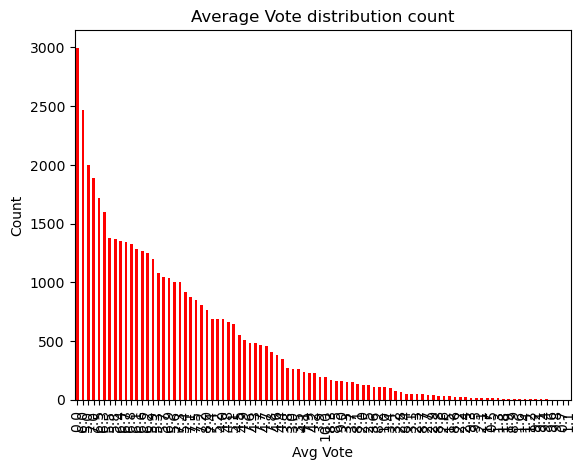

In [26]:
df['vote_average'].value_counts().plot.bar(color = 'red')
plt.title('Average Vote distribution count')
plt.xlabel('Avg Vote')
plt.ylabel('Count')
plt.show()

In [27]:
df['vote_average'].apply(lambda x: x> 5).value_counts()

vote_average
True     33571
False    11895
Name: count, dtype: int64

In [13]:
df['vote_average'].apply(lambda x: x== 10).sum()

190

In [14]:
df['vote_average'].apply(lambda x: x< 5).value_counts()

vote_average
False    35578
True      9888
Name: count, dtype: int64

In [15]:
df['genres'].values

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
       '[]', '[]'], dtype=object)

In [2]:
type(df['genres'])


NameError: name 'df' is not defined

In [58]:

for i, r in df.iterrows():
    inner= (r['genres'].split(','))
    inner = [eval(genre) for genre in inner]
    print(inner)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)

In [17]:
import ast 
type= []
result_string=''
for r,i in df.iterrows():
    list_of_dict= ast.literal_eval(i['genres'])
    for dictionary in list_of_dict:
        for key, value in dictionary.items():
            result_string += f" {value}, "
            
        
        print(result_string) 

     

: 

In [107]:
type

['Family']